# Розширені архітектури RNN

Рекурентні нейронні мережі (RNN) чудово підходять для обробки послідовних даних, але вони стикаються з проблемами, особливо коли послідовності стають довгими. Ця лекція зосереджена на вирішенні цих проблем за допомогою складніших архітектур RNN, таких як Gated Recurrent Unit (GRU) та Long Short-Term Memory (LSTM), та їх застосуванні до класифікації сентиментів на датасеті IMDB.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*aH9zyevvERfQVErl9gTchQ.png" width="700">

**Проблема розмиття та вибуху градієнтів**

Під час навчання глибоких рекурентних нейронних мереж (RNN) виникають дві проблеми - **розмиття** та **вибух градієнту**. Обидві проблеми пов'язані зі змінністю градієнтів під час зворотнього розповсюдження (backpropagation) через багато шарів мережі.


**Розмиття градієнтів (Vanishing Gradients)**

Розмиття градієнтів відбувається, коли градієнти стають дуже малими і не впливають на оновлення ваг у попередніх шарах мережі. Це особливо помітно в мовних моделях, де важливо зафіксувати віддалені залежності між словами в реченні. Наприклад, у реченні "Кіт їв і спав цілий день. Він був задоволений" потрібно розрізняти число та форму дієслів в залежності від суб'єкта. Однак, через розмиття градієнтів, нейромережа може не здатна визначити, чи є суб'єктом один кіт чи кілька котів.

**Причина:**

* Під час зворотнього розповсюдження градієнти множаться на похідні функції активації та ваги на кожному часовому кроці.
* Якщо похідні менші за 1, то градієнти будуть експоненційно зменшуватися з кожним кроком, що призведе до їх розмиття.

<img src="https://miro.medium.com/v2/resize:fit:960/format:webp/0*lym0Kq6cJVytuxjD.gif" width="700">


**Вибух градієнтів (Exploding Gradients)**

Вибух градієнтів відбувається, коли градієнти зростають експоненційно під час зворотнього розповсюдження через шари мережі. Це може призвести до числового переповнення (NaN) та неправильного оновлення ваг мережі. Вибух градієнтів є більш критичною проблемою, оскільки може спричинити руйнування мережі.

**Причина:**

* Аналогічно до розмиття градієнтів, градієнти множаться на похідні функції активації та ваги на кожному часовому кроці.
* Якщо похідні більші за 1, то градієнти будуть експоненційно зростати з кожним кроком, що призведе до їх вибуху.

<img src="https://miro.medium.com/v2/resize:fit:1048/format:webp/1*5LuVAMkwooXQoVo8kJf1TQ.png" width="700">


**Використання GRU та LSTM для розв'язання проблем.**

Для вирішення проблеми розмиття та вибуху градієнтів в RNN використовуються моделі з покращеними механізмами, такі як **GRU** та **LSTM**. Ці моделі дозволяють краще контролювати потік градієнтів і зберігати корисну інформацію про довготривалі залежності в послідовностях.


https://towardsdatascience.com/understanding-rnns-lstms-and-grus-ed62eb584d90

# GRU (Gated Recurrent Unit)

**Gated Recurrent Units (GRU)** - це тип RNN, який ефективно вирішує проблему розмиття градієнтів за допомогою механізмів **воріт**. Ворота контролюють потік інформації через мережу, дозволяючи їй вибірково запам'ятовувати та забувати інформацію.

**Структура GRU**

GRU має два типи воріт:

* **Ворота оновлення (Update Gate):** Визначає, скільки інформації з минулого (з попередніх часових кроків) потрібно передати в майбутнє.
* **Ворота скидання (Reset Gate):** Визначає, скільки інформації з минулого потрібно скинути (забути).


<img src="https://www.researchgate.net/publication/381517437/figure/fig3/AS:11431281252551623@1718777638582/Structure-of-GRU.png" width="700">


**Позначення:**

* $x_t$: Вхідний вектор на часовому кроці $t$.
* $h_{t-1}$: Прихований стан на попередньому часовому кроці $t-1$.
* $z_t$: Вектор воріт оновлення на часовому кроці $t$.
* $r_t$: Вектор воріт скидання на часовому кроці $t$.
* $\tilde{h}_t$: Кандидат на прихований стан на часовому кроці $t$.
* $h_t$: Прихований стан на часовому кроці $t$.

**Формули:**

1. **Ворота оновлення:**

   $
   z_t = \sigma(W_{xz}x_t + W_{hz}h_{t-1} + b_z)
   $

2. **Ворота скидання:**

   $
   r_t = \sigma(W_{xr}x_t + W_{hr}h_{t-1} + b_r)
   $

3. **Кандидат на прихований стан:**

   $
   \tilde{h}_t = tanh(W_{xh}x_t + W_{hh}(r_t * h_{t-1}) + b_h)
   $

4. **Прихований стан:**

   $
   h_t = z_t * h_{t-1} + (1 - z_t) * \tilde{h}_t
   $



<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png" width="1000">


**Пояснення:**

* **Ворота оновлення** ($z_t$) визначають, яка частина попереднього прихованого стану ($h_{t-1}$) буде збережена.
* **Ворота скидання** ($r_t$) визначають, яка частина попереднього прихованого стану ($h_{t-1}$) буде скинута перед обчисленням кандидата на прихований стан ($\tilde{h}_t$).
* **Кандидат на прихований стан** ($\tilde{h}_t$) обчислюється на основі поточного входу ($x_t$) та попереднього прихованого стану, помноженого на вектор воріт скидання.
* **Прихований стан** ($h_t$) обчислюється як лінійна інтерполяція між попереднім прихованим станом ($h_{t-1}$) та кандидатом на прихований стан ($\tilde{h}_t$), використовуючи вектор воріт оновлення ($z_t$).

In [ ]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# Завантаження зображення з URL
url = 'https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Зміна розміру зображення до розміру, який очікує модель
cat_img = img.resize((224, 224))

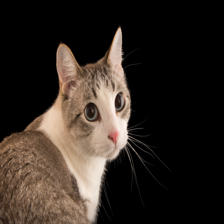

In [ ]:
cat_img

In [ ]:
# Завантаження зображення з URL
url = 'https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Зміна розміру зображення до розміру, який очікує модель
dog_img = img.resize((224, 224))

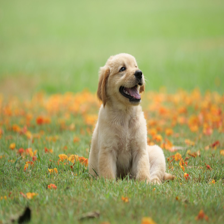

In [ ]:
dog_img

In [ ]:
cat_img = np.array(cat_img)
dog_img = np.array(dog_img)

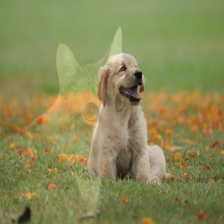

In [ ]:
coef = 0.8

result = (1 - coef) * cat_img + coef * dog_img

Image.fromarray(result.astype(np.uint8))

**Переваги GRU:**

* **Ефективне навчання довготривалих залежностей:** Механізми воріт допомагають GRU вирішувати проблему розмиття градієнтів, що дозволяє їй ефективніше навчати довготривалі залежності в послідовних даних.
* **Менше параметрів, ніж LSTM:** GRU має менше параметрів, ніж LSTM, що робить її швидшою в навчанні та менш схильною до перенавчання.

**Недоліки GRU**:

* **Може бути менш потужною, ніж LSTM:**  Для дуже складних задач, що вимагають збереження великої кількості інформації з минулого, LSTM може бути кращим вибором.


## Практика з GRU за допомогою Keras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense

In [ ]:
# Встановлення гіперпараметрів

max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 512

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X = np.hstack([x_train, x_test])
y = np.hstack([y_train, y_test])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_padded = pad_sequences(X, maxlen=maxlen)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(40000, 500)

In [ ]:
# Побудова моделі RNN

model = Sequential()
model.add(Embedding(max_features, 16))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
input_shape = (None, maxlen)
model.build(input_shape)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 32)                  │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,833 (643.88 KB)

 Trainable params: 164,833 (643.88 KB)

 Non-trainable params: 0 (0.00 B)

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 77s 68ms/step - accuracy: 0.6881 - loss: 0.5524 - val_accuracy: 0.8457 - val_loss: 0.3539
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.8773 - loss: 0.3032 - val_accuracy: 0.8905 - val_loss: 0.2733
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 72s 64ms/step - accuracy: 0.9040 - loss: 0.2497 - val_accuracy: 0.8290 - val_loss: 0.4728
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 73s 65ms/step - accuracy: 0.9137 - loss: 0.2185 - val_accuracy: 0.8947 - val_loss: 0.2742
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.9293 - loss: 0.1887 - val_accuracy: 0.9000 - val_loss: 0.2617


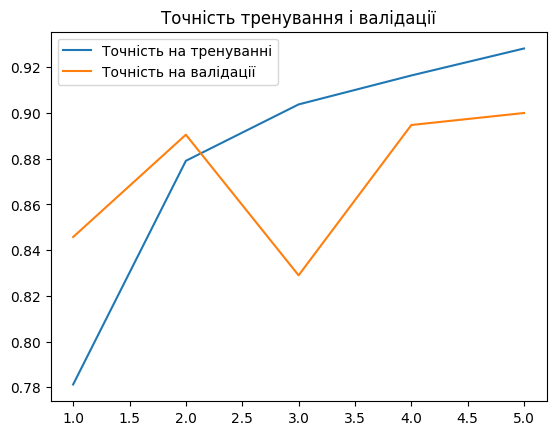

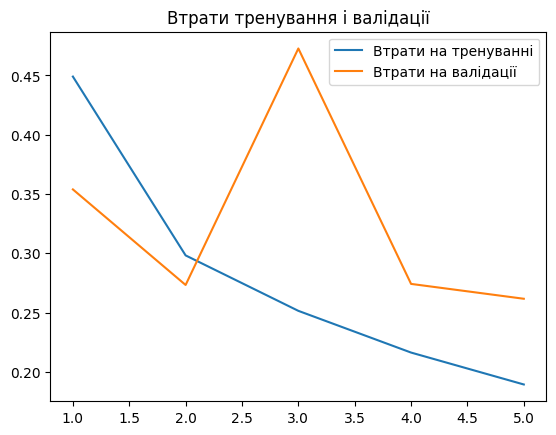

In [ ]:
# Відображення результатів

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Точність на тренуванні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Втрати на тренуванні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [ ]:
# Прогнозування з використанням навченої моделі

predictions = model.predict(x_test)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8917 - loss: 0.2751
Test Loss: 0.2737016975879669
Test Accuracy: 0.8909000158309937


# LSTM (Long Short-Term Memory)

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*5QBj5XpwCFhCKGn_fCD5qQ.png" width="700">


**Long Short-Term Memory (LSTM)** - це ще один тип RNN, який вирішує проблему розмиття градієнтів за допомогою механізмів воріт. LSTM має складнішу архітектуру, ніж GRU, з трьома типами воріт:

* **Ворота забування (Forget Gate):** Вирішує, яку інформацію забути з попереднього стану.
* **Ворота входу (Input Gate):** Вирішує, яку нову інформацію додати до стану.
* **Ворота виходу (Output Gate):** Вирішує, яку частину стану вивести.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Afy24CeHiPX0UM421NT1zA.png" width="700">


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*EMg2d6ot4vb84rNliKZ_Qg.png" width="700">


https://andy-nguyen.medium.com/long-short-term-memory-networks-lstm-b1efc2cc9e61

**Позначення:**

* $x_t$: Вхідний вектор на часовому кроці $t$.
* $h_{t-1}$: Прихований стан на попередньому часовому кроці $t-1$.
* $c_{t-1}$: Стан клітинки на попередньому часовому кроці $t-1$.
* $f_t$: Вектор воріт забування на часовому кроці $t$.
* $i_t$: Вектор воріт входу на часовому кроці $t$.
* $\tilde{c}_t$: Кандидат на стан клітинки на часовому кроці $t$.
* $c_t$: Стан клітинки на часовому кроці $t$.
* $o_t$: Вектор воріт виходу на часовому кроці $t$.
* $h_t$: Прихований стан на часовому кроці $t$.


**Формули:**

1. **Ворота забування:**

   $
   f_t = \sigma(W_{xf}x_t + W_{hf}h_{t-1} + b_f)
   $

2. **Ворота входу:**

   $
   i_t = \sigma(W_{xi}x_t + W_{hi}h_{t-1} + b_i)
   $

3. **Кандидат на стан клітинки:**

   $
   \tilde{c}_t = tanh(W_{xc}x_t + W_{hc}h_{t-1} + b_c)
   $

4. **Стан клітинки:**

   $
   c_t = f_t * c_{t-1} + i_t * \tilde{c}_t
   $

5. **Ворота виходу:**

   $
   o_t = \sigma(W_{xo}x_t + W_{ho}h_{t-1} + b_o)
   $

6. **Прихований стан:**

   $
   h_t = o_t * tanh(c_t)
   $



<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*XlZwZS9ZsqjFQ6HksipmsA.png" width="1000">


https://colah.github.io/posts/2015-08-Understanding-LSTMs/

**Пояснення:**

* **Ворота забування** ($f_t$) визначають, яка частина попереднього стану клітинки ($c_{t-1}$) буде забута.
* **Ворота входу** ($i_t$) визначають, яка частина кандидата на стан клітинки ($\tilde{c}_t$) буде додана до поточного стану клітинки.
* **Кандидат на стан клітинки** ($\tilde{c}_t$) обчислюється на основі поточного входу ($x_t$) та попереднього прихованого стану ($h_{t-1}$).
* **Стан клітинки** ($c_t$) обчислюється як комбінація забутої частини попереднього стану клітинки та доданої частини кандидата на стан клітинки.
* **Ворота виходу** ($o_t$) визначають, яка частина стану клітинки ($c_t$) буде виведена як прихований стан ($h_t$).
* **Прихований стан** ($h_t$) обчислюється як добуток вектора воріт виходу та гіперболічного тангенсу стану клітинки.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*goJVQs-p9kgLODFNyhl9zA.gif" width="1000">


**Переваги LSTM**

* **Потужний механізм пам'яті:**  LSTM здатна зберігати інформацію з далекого минулого, що робить її дуже ефективною для задач, що вимагають розуміння довготривалих залежностей в послідовних даних.

**Недоліки LSTM**

* **Складніша архітектура та більше параметрів:** LSTM має складнішу архітектуру та більше параметрів, ніж GRU, що робить її повільнішою в навчанні та більш схильною до перенавчання.

## Практика з LSTM за допомогою Keras

In [ ]:
from keras.layers import LSTM

In [ ]:
# Встановлення гіперпараметрів

max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 512

In [ ]:
# Побудова моделі RNN

model = Sequential()
model.add(Embedding(max_features, 16))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
input_shape = (None, maxlen)
model.build(input_shape)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 500, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,305 (649.63 KB)

 Trainable params: 166,305 (649.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - accuracy: 0.6136 - loss: 0.6365 - val_accuracy: 0.8405 - val_loss: 0.4163
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.8526 - loss: 0.3626 - val_accuracy: 0.8733 - val_loss: 0.3081
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 40s 74ms/step - accuracy: 0.8807 - loss: 0.2967 - val_accuracy: 0.8802 - val_loss: 0.3034
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.8908 - loss: 0.2786 - val_accuracy: 0.8593 - val_loss: 0.3358
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.9054 - loss: 0.2425 - val_accuracy: 0.8832 - val_loss: 0.2867


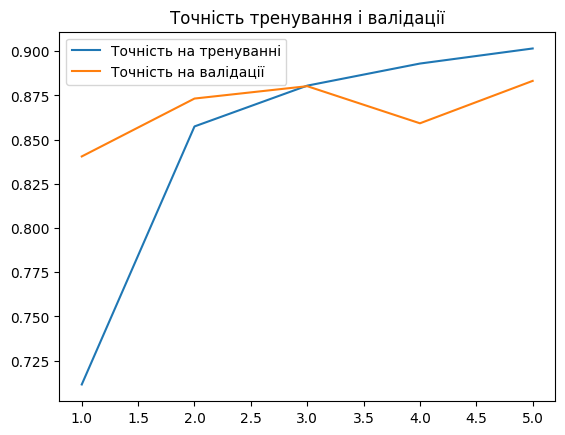

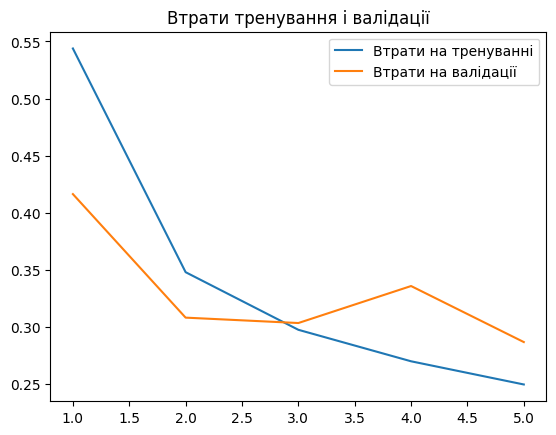

In [ ]:
# Відображення результатів

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Точність на тренуванні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Втрати на тренуванні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [ ]:
# Прогнозування з використанням навченої моделі

predictions = model.predict(x_test)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8838 - loss: 0.2789
Test Loss: 0.2782427668571472
Test Accuracy: 0.8827999830245972


# BRNN (Bidirectional RNN)

**Двонаправлені RNN (BRNN)** - це тип RNN, який обробляє послідовність в обох напрямках: зліва направо та справа наліво. Це дозволяє BRNN враховувати контекст з обох боків поточного елемента, що покращує точність моделі.

**Архітектура BRNN**

BRNN складається з двох RNN, які обробляють послідовність в протилежних напрямках. Вихідні значення обох RNN об'єднуються для отримання остаточного виходу.

<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2022/01/bilstm-1.png" width="1000">


**Пряме розповсюдження:**

* Прямий прихований стан:  $h_t^{(f)} = f(W_{xh}^{(f)}x_t + W_{hh}^{(f)}h_{t-1}^{(f)} + b_h^{(f)})$
* Зворотний прихований стан: $h_t^{(b)} = f(W_{xh}^{(b)}x_t + W_{hh}^{(b)}h_{t+1}^{(b)} + b_h^{(b)})$
* Об'єднаний прихований стан: $h_t = [h_t^{(f)}, h_t^{(b)}]$

**Вихід:**

* $y_t = g(W_{hy}h_t + b_y)$

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230302163012/Bidirectional-Recurrent-Neural-Network-2.png" width="700">


**Переваги BRNN:**

* **Більш повний контекст:**  BRNN враховує контекст з обох боків поточного елемента, що може бути корисним для задач, де контекст є важливим, таких як розпізнавання мови та машинний переклад.

**Недоліки BRNN:**

* **Потреба в повній послідовності:** BRNN потребує повну послідовність даних для обробки, що робить її непридатною для задач, де дані надходять поетапно, таких як розпізнавання мови в реальному часі.


## Практика з BRNN за допомогою Kera

In [ ]:
from keras.layers import Bidirectional

In [ ]:
# Встановлення гіперпараметрів

max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 512

In [ ]:
# Побудова моделі RNN

model = Sequential()
model.add(Embedding(max_features, 16))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
input_shape = (None, maxlen)
model.build(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 500, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          12,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,609 (674.25 KB)

 Trainable params: 172,609 (674.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - accuracy: 0.6531 - loss: 0.5985 - val_accuracy: 0.8727 - val_loss: 0.3247
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 38s 134ms/step - accuracy: 0.8879 - loss: 0.2823 - val_accuracy: 0.8780 - val_loss: 0.2995
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 135ms/step - accuracy: 0.9198 - loss: 0.2138 - val_accuracy: 0.8913 - val_loss: 0.2743
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 38s 135ms/step - accuracy: 0.9362 - loss: 0.1799 - val_accuracy: 0.8788 - val_loss: 0.3112
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 38s 134ms/step - accuracy: 0.9481 - loss: 0.1489 - val_accuracy: 0.8848 - val_loss: 0.3137


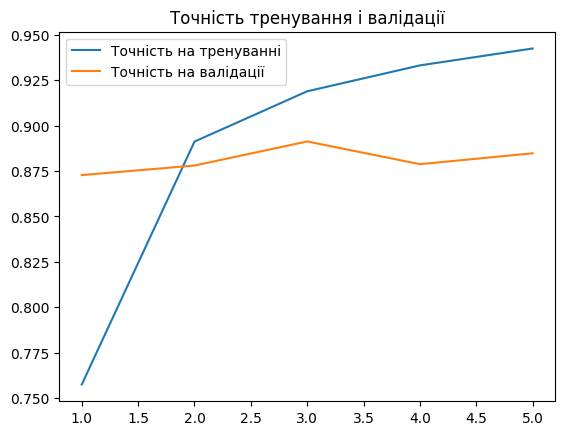

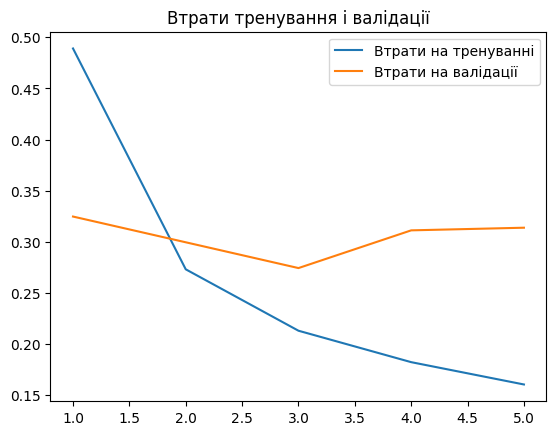

In [ ]:
# Відображення результатів

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Точність на тренуванні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Втрати на тренуванні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [ ]:
# Прогнозування з використанням навченої моделі

predictions = model.predict(x_test)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.8911 - loss: 0.2986
Test Loss: 0.3030402660369873
Test Accuracy: 0.8892999887466431


# DRNN (Deep RNN)

**Глибокі RNN (DRNN)** - це RNN з кількома шарами RNN, складеними один на одному. Це дозволяє моделям вивчати складніші ієрархічні представлення послідовних даних.


<img src="https://www.researchgate.net/profile/Bojan_Lukic2/publication/351547862/figure/fig5/AS:1022913150988291@1620892908974/Deep-RNN-left-unrolled-through-time-right-2.ppm" width="700">


Формули DRNN аналогічні до формул для звичайних RNN, але обчислення виконуються для кожного шару.

<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/deep-rnn-ltr.png?f57da6de44ddd4709ad3b696cac6a912" width="400">


**Переваги DRNN:**

* **Більш складні представлення:**  DRNN здатні вивчати складніші ієрархічні представлення послідовних даних.

**Недоліки DRNN:**

* **Більш складні в навчанні:** DRNN потребують більше даних та обчислювальних ресурсів для навчання, ніж RNN з одним шаром.

## Практика з DRNN за допомогою Keras

https://amitness.com/posts/recurrent-layers-keras

<img src="https://amitness.com/posts/images/rnn-stacked.png" width="800">


In [ ]:
# Встановлення гіперпараметрів

max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 512

In [ ]:
# Побудова моделі RNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Advanced stacking**

<img src="https://psu1.github.io/DeepRNN/deepRnn.png" width="1000">


In [ ]:
# Побудова моделі RNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

Ця модель використовує:

* **Embedding шар:** Для перетворення слів у вектори embedding.
* **Два шари Bidirectional LSTM:**  Для обробки послідовності в обох напрямках та вивчення складніших залежностей.
* **Dense шар:** Для класифікації сентименту.

In [ ]:
input_shape = (None, maxlen)
model.build(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 500, 256)            │         164,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 64)                  │          73,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 558,913 (2.13 MB)

 Trainable params: 558,913 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 175s 486ms/step - accuracy: 0.7199 - loss: 0.5113 - val_accuracy: 0.8723 - val_loss: 0.3062
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 141s 481ms/step - accuracy: 0.9055 - loss: 0.2492 - val_accuracy: 0.8450 - val_loss: 0.3964
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 146s 496ms/step - accuracy: 0.9265 - loss: 0.1957 - val_accuracy: 0.8925 - val_loss: 0.2930
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 137s 479ms/step - accuracy: 0.9470 - loss: 0.1452 - val_accuracy: 0.8885 - val_loss: 0.3014
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 135s 477ms/step - accuracy: 0.9595 - loss: 0.1168 - val_accuracy: 0.8740 - val_loss: 0.3207


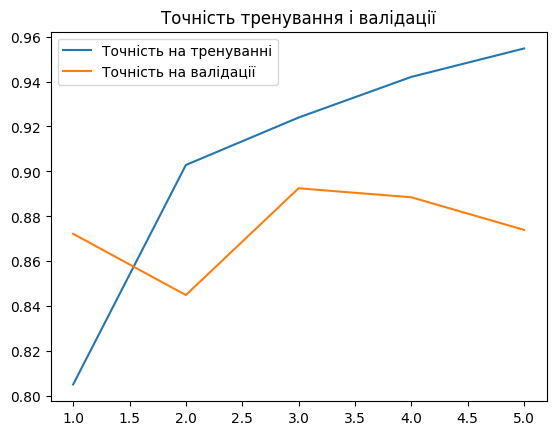

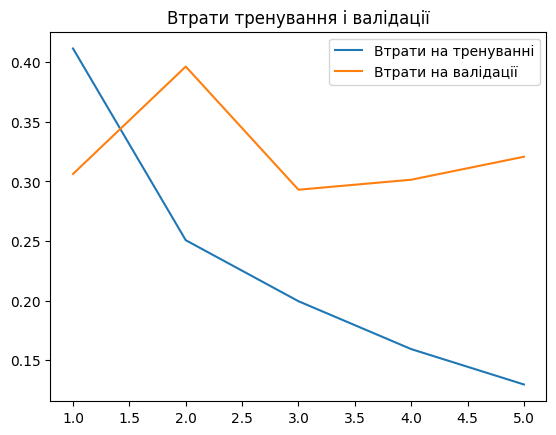

In [ ]:
# Відображення результатів

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Точність на тренуванні')
plt.plot(epochs, val_acc, label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Втрати на тренуванні')
plt.plot(epochs, val_loss, label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [ ]:
# Прогнозування з використанням навченої моделі

predictions = model.predict(x_test)
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step - accuracy: 0.8719 - loss: 0.3161
Test Loss: 0.31589561700820923
Test Accuracy: 0.8711000084877014





## Висновок

Складніші архітектури RNN, такі як GRU та LSTM, вирішують проблему розмиття градієнтів та дозволяють ефективніше обробляти довгі послідовності даних.  Вибір оптимальної архітектури залежить від конкретної задачі та наявних ресурсів.  Комбінування різних архітектур, таких як bidirectional layers та stacking, може призвести до подальшого покращення точності моделі.


# EXTRA: Character-level recurrent sequence-to-sequence model

Цей приклад демонструє, як реалізувати базову рекурентну модель "послідовність-в-послідовність" на рівні символів. Ми застосовуємо її для перекладу коротких англійських речень у короткі французькі речення, символ за символом. Зверніть увагу, що машинний переклад на рівні символів є досить незвичайним, оскільки в цій області частіше використовуються моделі на рівні слів.

**Короткий опис алгоритму**

- Ми починаємо з вхідних послідовностей з однієї області (наприклад, англійських речень) та відповідних цільових послідовностей з іншої області (наприклад, французьких речень).
- Кодувальник LSTM перетворює вхідні послідовності у 2 вектори стану (ми зберігаємо останній стан LSTM та відкидаємо виходи).
- Декодувальник LSTM навчається перетворювати цільові послідовності в ту ж саму послідовність, але зі зміщенням на один часовий крок у майбутнє, процес навчання, який у цьому контексті називається "примусовим навчанням" (teacher forcing). Він використовує як початковий стан вектори стану з кодувальника. Фактично, декодувальник навчається генерувати `цілі[t+1...]` за умови `цілі[...t]`, враховуючи вхідну послідовність.
- У режимі висновку, коли ми хочемо декодувати невідомі вхідні послідовності, ми:
    - Кодуємо вхідну послідовність у вектори стану.
    - Починаємо з цільової послідовності розміром 1 (лише символ початку послідовності).
    - Подаємо вектори стану та цільову послідовність з 1 символу до декодувальника, щоб отримати прогнози для наступного символу.
    - Вибираємо наступний символ, використовуючи ці прогнози (ми просто використовуємо argmax).
    - Додаємо вибраний символ до цільової послідовності.
    - Повторюємо, доки не згенеруємо символ кінця послідовності або не досягнемо ліміту символів.


https://keras.io/examples/nlp/lstm_seq2seq/

In [ ]:
# Setup

import numpy as np
import keras
import os
from pathlib import Path

In [ ]:
dirpath = "."
fpath = 'fra-eng.zip'

In [ ]:
import requests
url = 'https://www.manythings.org/anki/fra-eng.zip'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

r = requests.get(url, headers=headers)
# save the file:

open(fpath, 'wb').write(r.content)

7943074

In [ ]:
os.system(f"unzip -q {fpath} -d {dirpath}")

0

In [ ]:
# Configuration

batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = os.path.join(dirpath, "fra.txt")

## Prepare the data

In [ ]:
with open(data_path, "r", encoding="utf-8") as f:
    lines = f.read().split("\n")

In [ ]:
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()

for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, _ = line.split("\t")
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = "\t" + target_text + "\n"
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

Number of samples: 10000
Number of unique input tokens: 70
Number of unique output tokens: 91
Max sequence length for inputs: 14
Max sequence length for outputs: 59


In [ ]:
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype="float32",
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype="float32",
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype="float32",
)

In [ ]:
# Vectorize the data.

input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    encoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data[i, t:, target_token_index[" "]] = 1.0

## Build the model

https://www.kaggle.com/code/kmkarakaya/lstm-output-types-return-sequences-state

In [ ]:
# Define an input sequence and process it.
encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
encoder = keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, None, 70)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_10            │ (None, None, 91)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_11 (LSTM)            │ [(None, 256), (None,   │        334,848 │ input_layer_9[0][0]    │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_12 (LSTM)            │ [(None, None, 256),    │        356,352 │ input_layer_10[0][0],  │
│                           │ (None, 256), (None,    │                │ lstm_11[0][1],         │
│                           │ 256)]                  │                │ lstm_11[0][2]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, None, 91)       │         23,387 │ lstm_12[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,429,176 (5.45 MB)

 Trainable params: 714,587 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 714,589 (2.73 MB)

## Train the model

In [ ]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)
model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
)
# Save model
model.save("s2s_model.keras")

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7062 - loss: 1.5405 - val_accuracy: 0.7055 - val_loss: 1.1421
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7455 - loss: 0.9728 - val_accuracy: 0.7264 - val_loss: 0.9686
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7616 - loss: 0.8632 - val_accuracy: 0.7468 - val_loss: 0.9140
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7851 - loss: 0.7743 - val_accuracy: 0.7755 - val_loss: 0.7873
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8019 - loss: 0.6902 - val_accuracy: 0.7927 - val_loss: 0.7168
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8165 - loss: 0.6318 - val_accuracy: 0.8002 - val_loss: 0.6792
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8225 - loss: 0.6057 - val_accuracy: 0.8083 - val_loss: 0.6602
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8295 - loss: 0.5808 - 

## Run inference (sampling)

1. encode input and retrieve initial decoder state
2. run one step of decoder with this initial state
and a "start of sequence" token as target.
Output will be the next target token.
3. Repeat with the current target token and current states

In [ ]:
# Restore the model and construct the encoder and decoder.
model = keras.models.load_model("s2s_model.keras")

In [ ]:
# Define sampling models

encoder_inputs = model.input[0]  # input_1
encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output  # lstm_1
encoder_states = [state_h_enc, state_c_enc]
encoder_model = keras.Model(encoder_inputs, encoder_states)

decoder_inputs = model.input[1]  # input_2
decoder_state_input_h = keras.Input(shape=(latent_dim,))
decoder_state_input_c = keras.Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_lstm = model.layers[3]
decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs
)
decoder_states = [state_h_dec, state_c_dec]

decoder_dense = model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = keras.Model(
    [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
)

In [ ]:
# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq, verbose=0)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index["\t"]] = 1.0

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value, verbose=0
        )

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        # Update states
        states_value = [h, c]
    return decoded_sentence


You can now generate decoded sentences as such:

In [ ]:
for seq_index in range(20):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index : seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print("-")
    print("Input sentence:", input_texts[seq_index])
    print("Decoded sentence:", decoded_sentence)

-
Input sentence: Go.
Decoded sentence: Courois.

-
Input sentence: Go.
Decoded sentence: Courois.

-
Input sentence: Go.
Decoded sentence: Courois.

-
Input sentence: Go.
Decoded sentence: Courois.

-
Input sentence: Hi.
Decoded sentence: Salut !

-
Input sentence: Hi.
Decoded sentence: Salut !

-
Input sentence: Run!
Decoded sentence: Filez !

-
Input sentence: Run!
Decoded sentence: Filez !

-
Input sentence: Run!
Decoded sentence: Filez !

-
Input sentence: Run!
Decoded sentence: Filez !

-
Input sentence: Run!
Decoded sentence: Filez !

-
Input sentence: Run!
Decoded sentence: Filez !

-
Input sentence: Run!
Decoded sentence: Filez !

-
Input sentence: Run!
Decoded sentence: Filez !

-
Input sentence: Run.
Decoded sentence: Filez !

-
Input sentence: Run.
Decoded sentence: Filez !

-
Input sentence: Run.
Decoded sentence: Filez !

-
Input sentence: Run.
Decoded sentence: Filez !

-
Input sentence: Run.
Decoded sentence: Filez !

-
Input sentence: Run.
Decoded sentence: Filez !

